# General

In [1]:
# Imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
pesticides_data = pd.read_csv('pesticides(1990-2020).csv')
rainfall_data = pd.read_csv('rainfall(1981-2022).csv')
temperature_data = pd.read_csv('temp(1743-2020).csv')
yield_data = pd.read_csv('yield(1990-2021).csv')

# Data Preparation


## Rainfall data

In [3]:
rainfall_data['Year']

0        1981
1        1982
2        1983
3        1984
4        1985
         ... 
18601    2018
18602    2019
18603    2020
18604    2021
18605    2022
Name: Year, Length: 18606, dtype: int64

In [4]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18606 entries, 0 to 18605
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     18606 non-null  int64  
 1   Country  18606 non-null  object 
 2   mean     15204 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 436.2+ KB


In [5]:
rainfall_data.describe()

,Year,mean
count,18606.000000,15204.000000
mean,2001.500000,1055.670800
std,12.121244,796.412417
min,1981.000000,8.847583
25%,1991.000000,491.967611
50%,2001.500000,821.240192
75%,2012.000000,1468.481011
max,2022.000000,6350.815740


In [6]:
# Number of countries
len(rainfall_data['Country'].unique())

282

In [7]:
# Number of years (1981-2022)
len(rainfall_data['Year'].unique())

42

In [8]:
# One year from Afghanistan
rainfall_data.head(12)

,Year,Country,mean
0,1981,Abyei Area,859.509744
1,1982,Abyei Area,684.560852
2,1983,Abyei Area,691.337678
3,1984,Abyei Area,597.233865
4,1985,Abyei Area,825.209919
5,1986,Abyei Area,681.882913
6,1987,Abyei Area,805.058951
7,1988,Abyei Area,906.029783
8,1989,Abyei Area,797.442880
9,1990,Abyei Area,768.386335


In [9]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country'], as_index=False, axis=0).sum()
rainfall_df

,Year,Country,mean
0,1981,Abyei Area,859.509744
1,1981,Afghanistan,267.708285
2,1981,Akrotiri,579.704252
3,1981,Aksai Chin,111.047099
4,1981,Albania,1465.252732
...,...,...,...
11839,2022,West Bank,1893.492489
11840,2022,Western Sahara,61.926385
11841,2022,Yemen,198.798837
11842,2022,Zambia,1106.520637


## Temperature data

In [10]:
temperature_data

,Year,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865
...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.621,1.401,0.466
534567,2020,9,Zimbabwe,22.638,1.008,0.246
534568,2020,10,Zimbabwe,24.588,0.458,0.294
534569,2020,11,Zimbabwe,25.934,1.724,1.035


In [11]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534571 entries, 0 to 534570
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               534571 non-null  int64  
 1   Month              534571 non-null  int64  
 2   Country            534571 non-null  object 
 3   Temperature        508818 non-null  float64
 4   Monthly_variation  508818 non-null  float64
 5   Anomaly            508818 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 24.5+ MB


In [12]:
temperature_data.describe()

,Year,Month,Temperature,Monthly_variation,Anomaly
count,534571.000000,534571.000000,508818.000000,508818.000000,508818.000000
mean,1917.483008,6.500676,17.059014,-0.075495,0.888305
std,65.628555,3.452036,11.201763,1.231296,1.069699
min,1743.000000,1.000000,-40.349000,-10.566000,0.037000
25%,1873.000000,4.000000,9.776250,-0.663000,0.293000
50%,1924.000000,7.000000,20.705000,-0.076000,0.494000
75%,1972.000000,10.000000,25.911000,0.552000,1.004000
max,2020.000000,12.000000,39.384000,11.817000,12.203000


In [13]:
# Number of countries
len(temperature_data['Country'].unique())

233

In [14]:
# Number of years (1743-2020)
len(temperature_data['Year'].unique())

278

In [15]:
# One year from Afghanistan
temperature_data.head(12)

,Year,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865
5,1848,10,Afghanistan,13.086,-0.934,1.880
6,1848,11,Afghanistan,6.841,-0.769,1.835
7,1848,12,Afghanistan,1.198,-1.842,2.034
8,1849,1,Afghanistan,0.585,-0.095,2.550
9,1849,2,Afghanistan,2.710,-0.560,2.098


In [16]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country'], as_index=False, axis=0).mean()
temperature_df.head(20)

,Year,Country,Month,Temperature,Monthly_variation,Anomaly
0,1743,Czech Republic,12.0,NaN,NaN,NaN
1,1743,Faroe Islands,12.0,NaN,NaN,NaN
2,1743,Guernsey,12.0,NaN,NaN,NaN
3,1743,Isle of Man,12.0,NaN,NaN,NaN
4,1743,Jersey,12.0,NaN,NaN,NaN
5,1743,Saint Pierre and Miquelon,12.0,NaN,NaN,NaN
6,1743,Serbia,12.0,NaN,NaN,NaN
7,1744,Czech Republic,6.5,9.077625,-0.562375,1.874500
8,1744,Faroe Islands,6.5,6.927625,-0.693625,1.801750
9,1744,Guernsey,6.5,11.593375,-0.481625,1.760250


In [17]:
show_temp = temperature_df.loc[(temperature_df['Country']=='Afghanistan')&(temperature_df['Year']>=1990)]
show_temp[['Year','Country','Temperature']]

,Year,Country,Temperature
37591,1990,Afghanistan,14.704917
37824,1991,Afghanistan,14.049583
38057,1992,Afghanistan,13.743833
38290,1993,Afghanistan,14.172917
38523,1994,Afghanistan,14.475417
38756,1995,Afghanistan,14.514417
38989,1996,Afghanistan,14.126417
39222,1997,Afghanistan,14.507000
39455,1998,Afghanistan,14.910417
39688,1999,Afghanistan,15.119750



## Yield data

In [18]:
yield_data

,Area,Item,Element,Unit,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Almonds, in shell",Yield,hg/ha,15736.0,16364.0,18000.0,16364.0,16364.0,16364.0,...,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0,18748.0
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,hg/ha,7692.0,7072.0,7143.0,6854.0,6761.0,6667.0,...,6757.0,6757.0,7167.0,7200.0,7075.0,6970.0,7866.0,6902.0,7409.0,7379.0
2,Afghanistan,Apples,Yield,hg/ha,71319.0,74636.0,74516.0,73913.0,74468.0,74766.0,...,76519.0,76005.0,73000.0,68824.0,72762.0,63487.0,76527.0,90832.0,105626.0,110245.0
3,Afghanistan,Apricots,Yield,hg/ha,70440.0,75278.0,74131.0,72549.0,73576.0,72816.0,...,100000.0,99944.0,99944.0,96189.0,20819.0,72960.0,58934.0,73008.0,75389.0,74779.0
4,Afghanistan,Barley,Yield,hg/ha,10537.0,10637.0,8000.0,10000.0,9200.0,8889.0,...,18000.0,18489.0,15213.0,14291.0,13770.0,13933.0,6748.0,14699.0,14838.0,14594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12578,Polynesia,"Oilcrops, Cake Equivalent",Yield,hg/ha,NaN,3168.0,3649.0,3690.0,3772.0,4061.0,...,4947.0,4951.0,4392.0,3832.0,3549.0,3480.0,3447.0,3342.0,3283.0,3252.0
12579,Polynesia,"Oilcrops, Oil Equivalent",Yield,hg/ha,NaN,5052.0,5835.0,5908.0,6059.0,6541.0,...,7967.0,7963.0,7042.0,6125.0,5655.0,5544.0,5497.0,5333.0,5239.0,5185.0
12580,Polynesia,"Roots and Tubers, Total",Yield,hg/ha,80227.0,92134.0,97750.0,105208.0,95631.0,88832.0,...,72426.0,72410.0,70119.0,61479.0,55996.0,50907.0,72385.0,82474.0,80823.0,66104.0
12581,Polynesia,Sugar Crops Primary,Yield,hg/ha,678500.0,703250.0,685854.0,686098.0,685854.0,685854.0,...,816744.0,856585.0,856559.0,850603.0,845353.0,841109.0,853261.0,861264.0,866914.0,872565.0


In [19]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12583 entries, 0 to 12582
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     12583 non-null  object 
 1   Item     12583 non-null  object 
 2   Element  12583 non-null  object 
 3   Unit     12583 non-null  object 
 4   1990     8809 non-null   float64
 5   1991     9512 non-null   float64
 6   1992     10494 non-null  float64
 7   1993     10636 non-null  float64
 8   1994     10732 non-null  float64
 9   1995     10779 non-null  float64
 10  1996     10812 non-null  float64
 11  1997     10869 non-null  float64
 12  1998     10914 non-null  float64
 13  1999     10996 non-null  float64
 14  2000     11109 non-null  float64
 15  2001     11135 non-null  float64
 16  2002     11152 non-null  float64
 17  2003     11242 non-null  float64
 18  2004     11306 non-null  float64
 19  2005     11332 non-null  float64
 20  2006     11375 non-null  float64
 21  2007     112

In [20]:
yield_data.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,8.809000e+03,9.512000e+03,1.049400e+04,1.063600e+04,1.073200e+04,1.077900e+04,1.081200e+04,1.086900e+04,1.091400e+04,1.099600e+04,...,1.135300e+04,1.135700e+04,1.137100e+04,1.138600e+04,1.139500e+04,1.143400e+04,1.111100e+04,1.112000e+04,1.113600e+04,1.113800e+04
mean,9.974477e+04,9.210602e+04,9.044238e+04,9.039859e+04,9.083502e+04,9.226515e+04,9.381512e+04,9.433043e+04,9.443532e+04,9.667954e+04,...,1.099169e+05,1.121315e+05,1.154910e+05,1.158591e+05,1.159168e+05,1.170742e+05,1.200323e+05,1.213559e+05,1.219833e+05,1.224590e+05
std,2.415612e+05,1.695179e+05,1.681107e+05,1.683842e+05,1.708923e+05,1.783896e+05,1.782277e+05,1.826681e+05,1.805391e+05,1.880344e+05,...,2.212093e+05,2.315455e+05,2.392462e+05,2.378749e+05,2.343672e+05,2.374146e+05,2.450102e+05,2.497117e+05,2.498573e+05,2.529081e+05
min,1.820000e+02,0.000000e+00,0.000000e+00,8.000000e+01,1.110000e+02,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.365200e+04,1.177175e+04,1.178750e+04,1.200450e+04,1.186250e+04,1.205850e+04,1.249450e+04,1.230200e+04,1.256075e+04,1.256050e+04,...,1.478300e+04,1.500000e+04,1.508500e+04,1.537075e+04,1.541050e+04,1.530700e+04,1.602900e+04,1.601900e+04,1.611025e+04,1.601625e+04
50%,5.077100e+04,4.686500e+04,4.500000e+04,4.502150e+04,4.500000e+04,4.528300e+04,4.648700e+04,4.644400e+04,4.693750e+04,4.776450e+04,...,5.086800e+04,5.181800e+04,5.248700e+04,5.318750e+04,5.286000e+04,5.304250e+04,5.453200e+04,5.555400e+04,5.542400e+04,5.499000e+04
75%,1.144000e+05,1.083330e+05,1.075420e+05,1.083090e+05,1.080228e+05,1.092310e+05,1.113530e+05,1.113100e+05,1.122300e+05,1.146748e+05,...,1.323430e+05,1.341850e+05,1.365290e+05,1.386452e+05,1.391910e+05,1.401165e+05,1.449815e+05,1.445370e+05,1.453740e+05,1.449982e+05
max,1.470000e+07,4.325455e+06,4.606364e+06,5.150000e+06,5.367000e+06,6.350000e+06,6.313750e+06,6.928571e+06,6.357143e+06,6.408451e+06,...,6.591640e+06,6.666667e+06,7.357860e+06,7.431193e+06,6.851852e+06,6.896552e+06,6.840167e+06,6.837500e+06,7.051967e+06,6.383188e+06


In [21]:
# Number of countries
len(yield_data['Area'].unique())

213

In [22]:
yield_data = (yield_data.set_index(["Area", "Item","Element","Unit"])
         .stack()
         .reset_index(name='Value')
         .rename(columns={'level_4':'Year'}))
yield_data

,Area,Item,Element,Unit,Year,Value
0,Afghanistan,"Almonds, in shell",Yield,hg/ha,1990,15736.0
1,Afghanistan,"Almonds, in shell",Yield,hg/ha,1991,16364.0
2,Afghanistan,"Almonds, in shell",Yield,hg/ha,1992,18000.0
3,Afghanistan,"Almonds, in shell",Yield,hg/ha,1993,16364.0
4,Afghanistan,"Almonds, in shell",Yield,hg/ha,1994,16364.0
...,...,...,...,...,...,...
352388,Polynesia,Vegetables Primary,Yield,hg/ha,2017,40727.0
352389,Polynesia,Vegetables Primary,Yield,hg/ha,2018,40801.0
352390,Polynesia,Vegetables Primary,Yield,hg/ha,2019,40660.0
352391,Polynesia,Vegetables Primary,Yield,hg/ha,2020,40850.0


In [23]:
# Number of years (1990-2021)
len(yield_data['Year'].unique())

32

In [24]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Element'], axis=1)
yield_df

,Area,Item,Unit,Year,Value
0,Afghanistan,"Almonds, in shell",hg/ha,1990,15736.0
1,Afghanistan,"Almonds, in shell",hg/ha,1991,16364.0
2,Afghanistan,"Almonds, in shell",hg/ha,1992,18000.0
3,Afghanistan,"Almonds, in shell",hg/ha,1993,16364.0
4,Afghanistan,"Almonds, in shell",hg/ha,1994,16364.0
...,...,...,...,...,...
352388,Polynesia,Vegetables Primary,hg/ha,2017,40727.0
352389,Polynesia,Vegetables Primary,hg/ha,2018,40801.0
352390,Polynesia,Vegetables Primary,hg/ha,2019,40660.0
352391,Polynesia,Vegetables Primary,hg/ha,2020,40850.0


In [25]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352393 entries, 0 to 352392
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Area    352393 non-null  object 
 1   Item    352393 non-null  object 
 2   Unit    352393 non-null  object 
 3   Year    352393 non-null  object 
 4   Value   352393 non-null  float64
dtypes: float64(1), object(4)
memory usage: 13.4+ MB


In [26]:
yield_df['Year'] = yield_df['Year'].astype(np.int64)

In [27]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352393 entries, 0 to 352392
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Area    352393 non-null  object 
 1   Item    352393 non-null  object 
 2   Unit    352393 non-null  object 
 3   Year    352393 non-null  int64  
 4   Value   352393 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.4+ MB


In [28]:
from collections import Counter
name_count = Counter(yield_df.Item)
print(name_count)

most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

Counter({'Roots and Tubers, Total': 6336, 'Vegetables Primary': 6336, 'Fruit Primary': 6335, 'Other vegetables, fresh n.e.c.': 6184, 'Cereals, primary': 5886, 'Oilcrops, Oil Equivalent': 5791, 'Oilcrops, Cake Equivalent': 5714, 'Pulses, Total': 5593, 'Tomatoes': 5393, 'Maize (corn)': 5339, 'Potatoes': 5095, 'Other fruits, n.e.c.': 4984, 'Cabbages': 4724, 'Sugar Crops Primary': 4615, 'Citrus Fruit, Total': 4538, 'Onions and shallots, dry (excluding dehydrated)': 4492, 'Cucumbers and gherkins': 4293, 'Unmanufactured tobacco': 4272, 'Carrots and turnips': 4077, 'Wheat': 4041, 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)': 3946, 'Rice': 3917, 'Beans, dry': 3909, 'Bananas': 3908, 'Oranges': 3883, 'Fibre Crops, Fibre Equivalent': 3839, 'Watermelons': 3799, 'Groundnuts, excluding shelled': 3797, 'Sweet potatoes': 3752, 'Treenuts, Total': 3657, 'Pumpkins, squash and gourds': 3651, 'Sorghum': 3566, 'Lemons and limes': 3428, 'Other pulses n.e.c.': 3414, 'Other beans, green': 335

[('Roots and Tubers, Total', 6336), ('Vegetables Primary', 6336), ('Fruit Primary', 6335), ('Other vegetables, fresh n.e.c.', 6184), ('Cereals, primary', 5886), ('Oilcrops, Oil Equivalent', 5791), ('Oilcrops, Cake Equivalent', 5714), ('Pulses, Total', 5593), ('Tomatoes', 5393), ('Maize (corn)', 5339), ('Potatoes', 5095), ('Other fruits, n.e.c.', 4984), ('Cabbages', 4724), ('Sugar Crops Primary', 4615), ('Citrus Fruit, Total', 4538)]


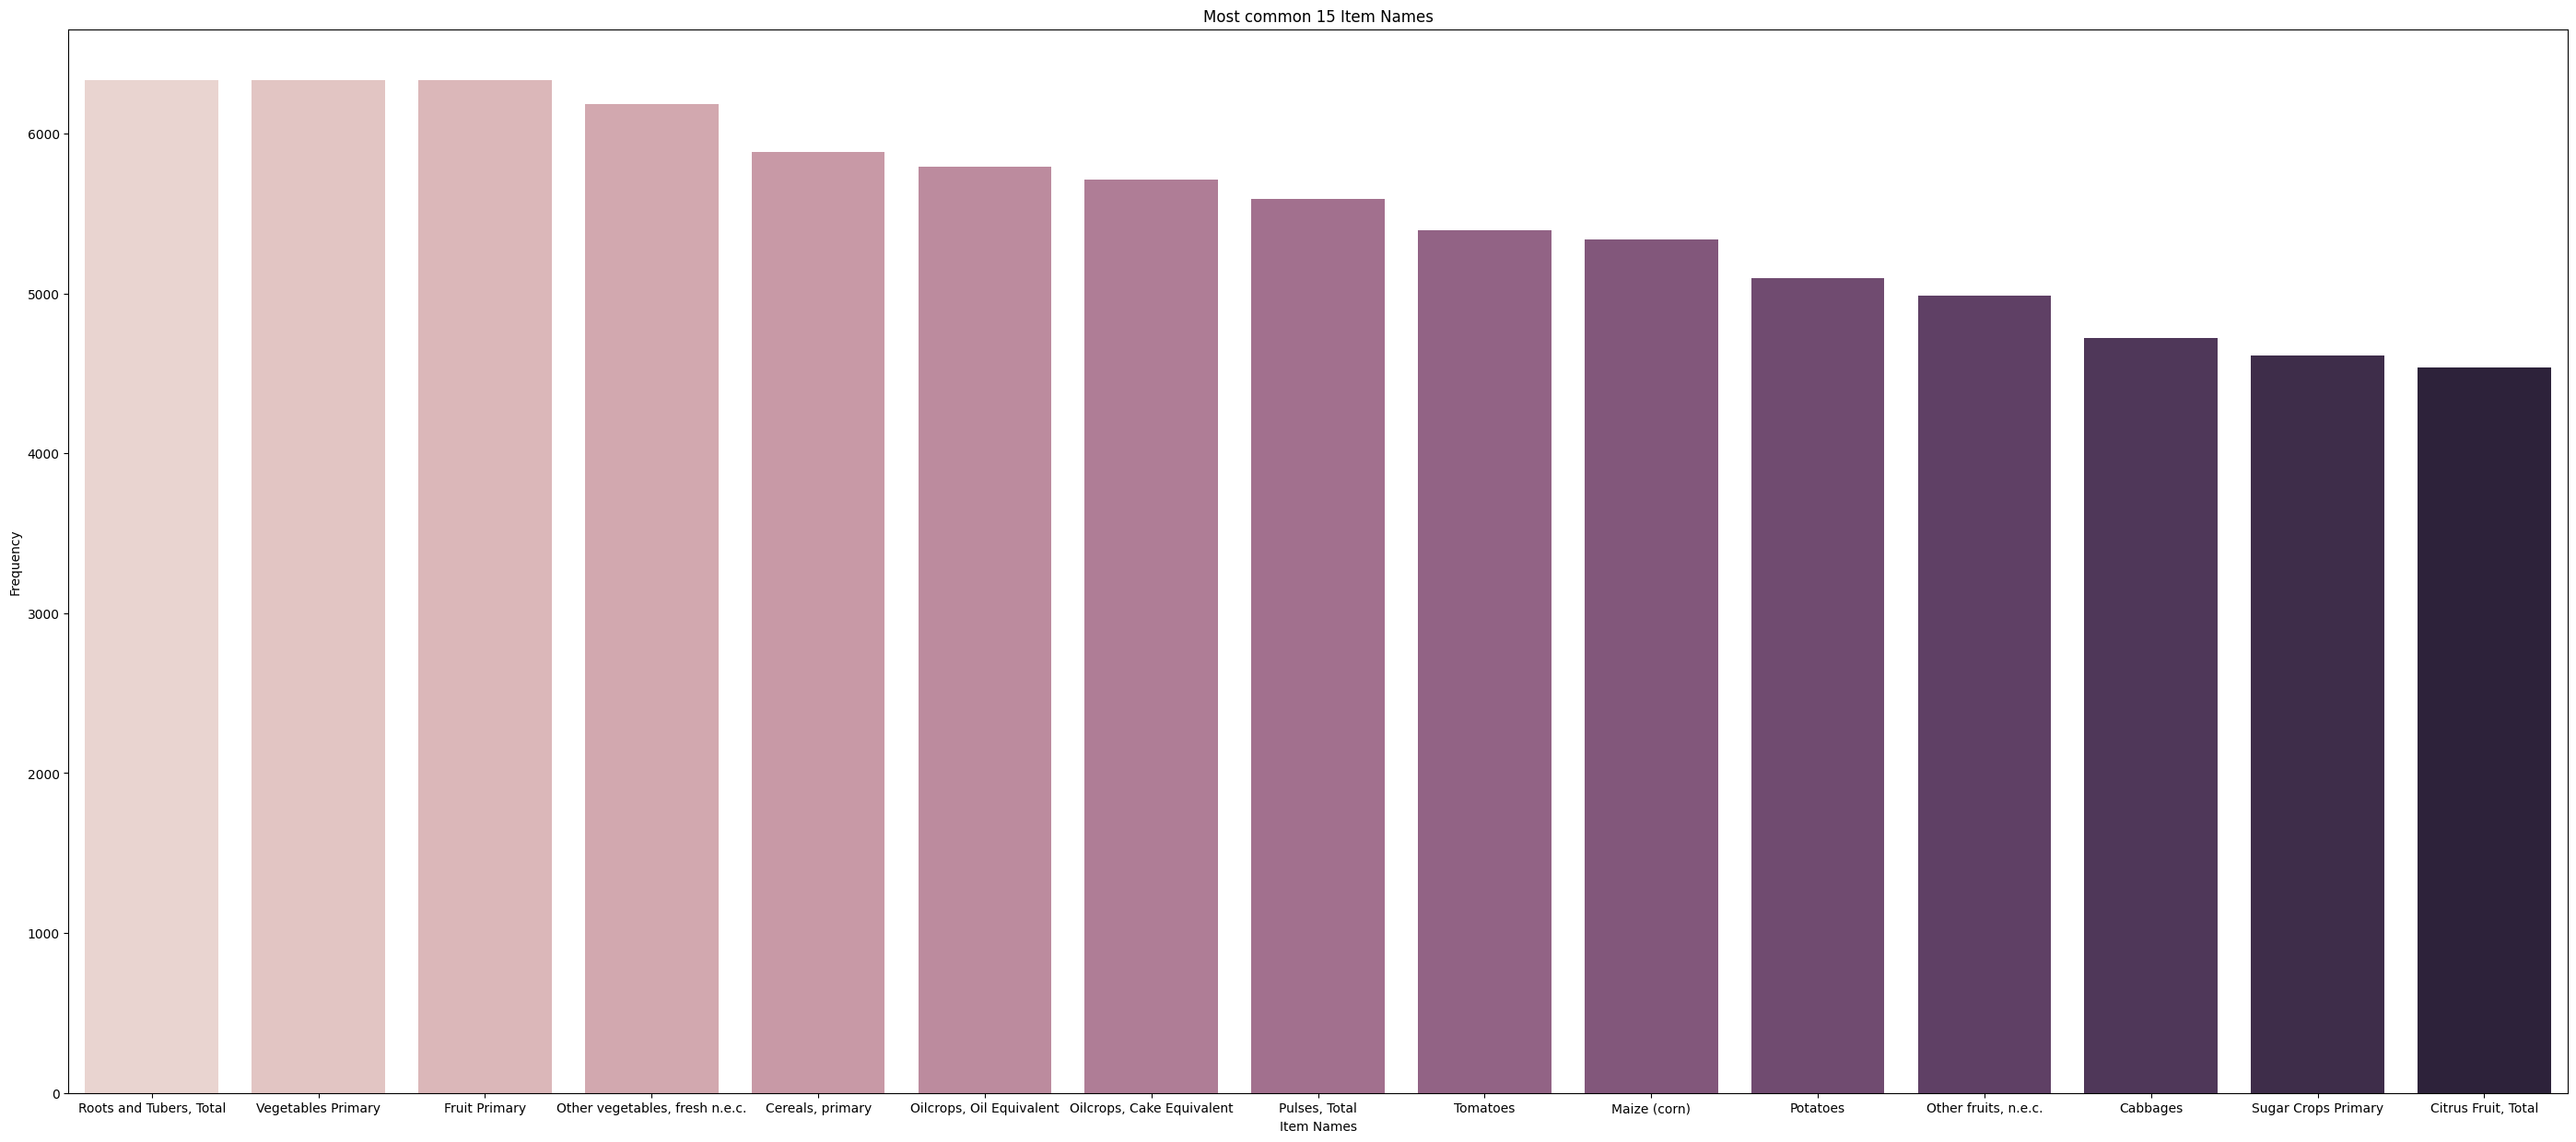

In [29]:
plt.figure(figsize=(35,15))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Item Names')
plt.ylabel('Frequency')
plt.title('Most common 15 Item Names')
print(most_common_names)

## Pesticides data

In [30]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121.00
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121.00
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121.00
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121.00
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201.00
...,...,...,...,...,...,...,...
5178,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185.07
5179,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185.07
5180,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2018,tonnes,2185.07
5181,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2019,tonnes,2185.07


In [31]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183 entries, 0 to 5182
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   5183 non-null   object 
 1   Area     5183 non-null   object 
 2   Element  5183 non-null   object 
 3   Item     5183 non-null   object 
 4   Year     5183 non-null   int64  
 5   Unit     5183 non-null   object 
 6   Value    5183 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 283.6+ KB


In [32]:
pesticides_data.describe()

,Year,Value
count,5183.000000,5183.000000
mean,2005.147791,15195.561912
std,8.876536,50085.996162
min,1990.000000,0.030000
25%,1997.000000,98.000000
50%,2005.000000,1348.140000
75%,2013.000000,8022.955000
max,2020.000000,434540.760000


In [33]:
# Number of countries
len(pesticides_data['Area'].unique())

174

In [34]:
# Number of years (1990-2020)
len(pesticides_data['Year'].unique())

31

In [35]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121.00
1,Albania,Pesticides (total),1991,tonnes,121.00
2,Albania,Pesticides (total),1992,tonnes,121.00
3,Albania,Pesticides (total),1993,tonnes,121.00
4,Albania,Pesticides (total),1994,tonnes,201.00
...,...,...,...,...,...
5178,Zimbabwe,Pesticides (total),2016,tonnes,2185.07
5179,Zimbabwe,Pesticides (total),2017,tonnes,2185.07
5180,Zimbabwe,Pesticides (total),2018,tonnes,2185.07
5181,Zimbabwe,Pesticides (total),2019,tonnes,2185.07


## Merging

In [36]:
rainfall_df.rename({'mean': 'Rainfall (mm)'}, axis=1, inplace=True)

In [37]:
temperature_df.rename({'Temperature': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [38]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [39]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)

In [40]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Apples,1051.851025,13.69375,121.00,50385.0
1,1990,Albania,Apricots,1051.851025,13.69375,121.00,43814.0
2,1990,Albania,Barley,1051.851025,13.69375,121.00,10000.0
3,1990,Albania,"Beans, dry",1051.851025,13.69375,121.00,6364.0
4,1990,Albania,Cabbages,1051.851025,13.69375,121.00,180769.0
...,...,...,...,...,...,...,...
227001,2020,Zimbabwe,"Pulses, Total",786.204172,21.95925,2185.07,3578.0
227002,2020,Zimbabwe,"Roots and Tubers, Total",786.204172,21.95925,2185.07,45677.0
227003,2020,Zimbabwe,Sugar Crops Primary,786.204172,21.95925,2185.07,753994.0
227004,2020,Zimbabwe,"Treenuts, Total",786.204172,21.95925,2185.07,20856.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227006 entries, 0 to 227005
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   227006 non-null  int64  
 1   Country                227006 non-null  object 
 2   Item                   227006 non-null  object 
 3   Rainfall (mm)          227006 non-null  float64
 4   Temperature (Celsius)  227006 non-null  float64
 5   Pesticides (tonnes)    227006 non-null  float64
 6   Yield (hg/ha)          227006 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 12.1+ MB


In [42]:
data.Country.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Bhutan',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Costa Rica', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
       'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia',
       'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Pakistan',
       'Panama', '

In [43]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,227006.000000,227006.000000,227006.000000,227006.000000,2.270060e+05
mean,2005.426412,1446.949593,18.787994,19768.839472,1.080404e+05
std,8.788199,2919.188388,8.191053,50038.515899,2.028614e+05
min,1990.000000,0.000000,-19.835917,0.030000,0.000000e+00
25%,1998.000000,456.669474,12.290833,542.820000,1.428600e+04
50%,2006.000000,888.414515,21.201500,2861.900000,5.000000e+04
75%,2013.000000,1585.480279,25.707250,13697.000000,1.300000e+05
max,2020.000000,31077.036444,30.382917,395646.000000,6.200000e+06


In [44]:
# Number of countries
len(data.Country.unique())

130

In [45]:
# Number of years (1990 - 2020)
len(data.Year.unique())

31

# Data Exploration

## Rainfall data

In [46]:
rainfall_df

,Year,Country,Rainfall (mm)
0,1981,Abyei Area,859.509744
1,1981,Afghanistan,267.708285
2,1981,Akrotiri,579.704252
3,1981,Aksai Chin,111.047099
4,1981,Albania,1465.252732
...,...,...,...
11839,2022,West Bank,1893.492489
11840,2022,Western Sahara,61.926385
11841,2022,Yemen,198.798837
11842,2022,Zambia,1106.520637


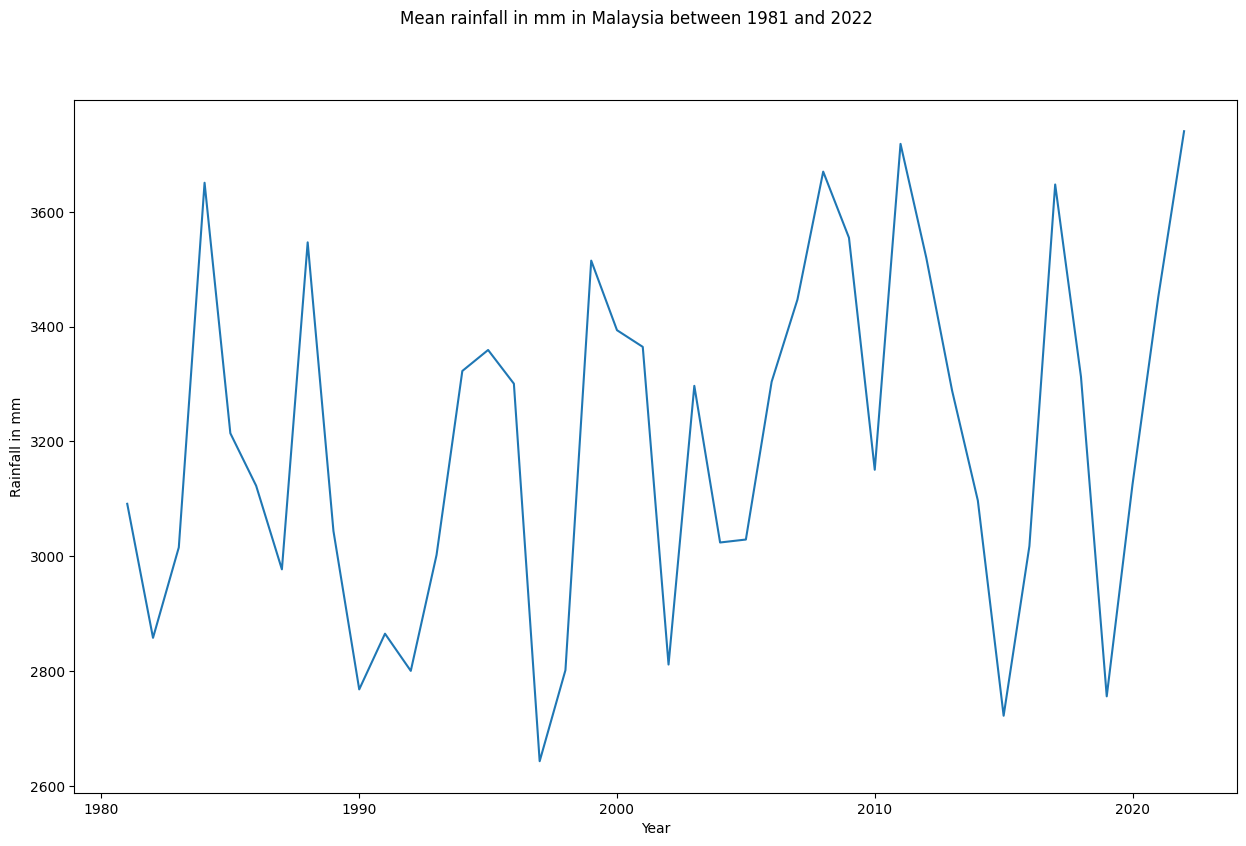

In [47]:
# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm in Malaysia between 1981 and 2022')

temp_data = rainfall_df.loc[rainfall_df['Country'] == 'Malaysia'].groupby('Year')['Rainfall (mm)'].mean().plot(ax=ax)
ax.set_ylabel('Rainfall in mm')
ax.set_xlabel('Year')

plt.show()

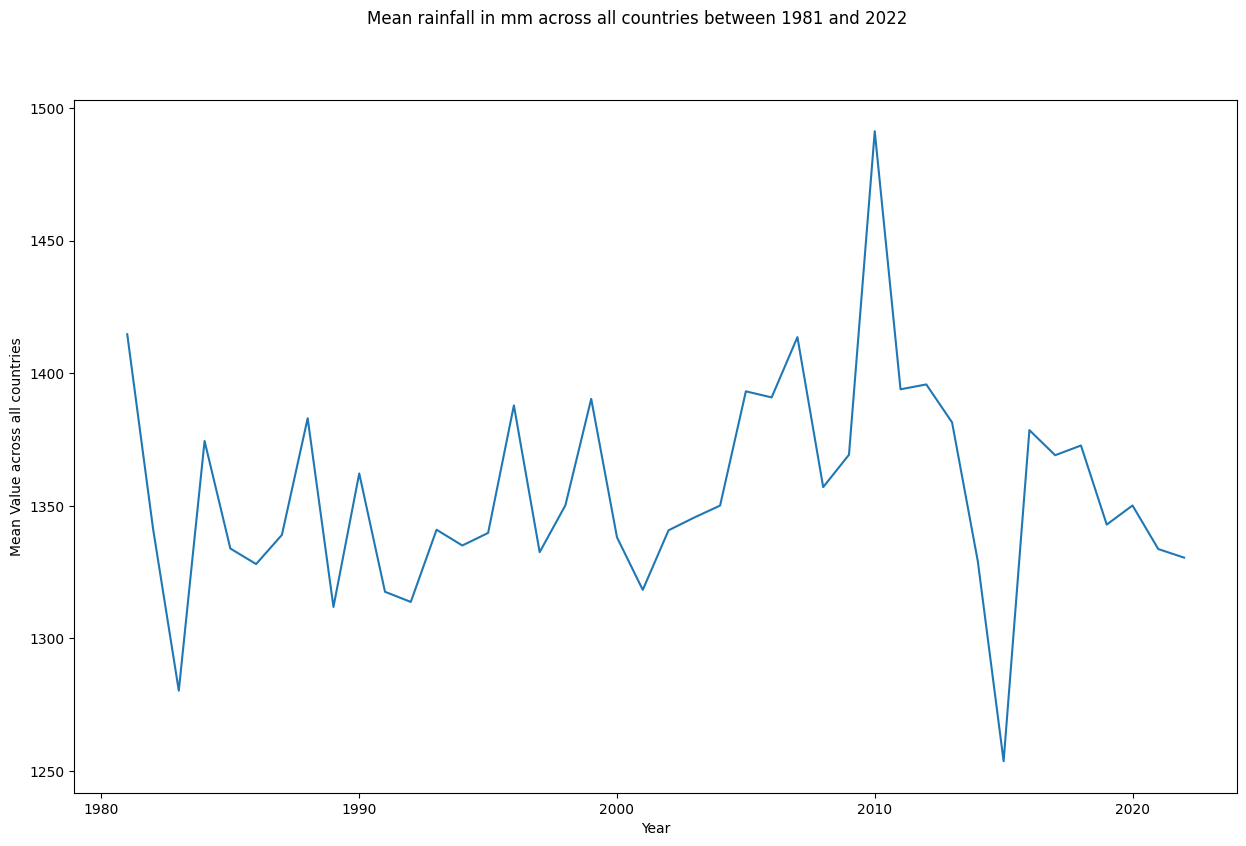

In [48]:
# prepare data
temp_data = rainfall_df.groupby('Year')['Rainfall (mm)'].mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1981 and 2022')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Temperature data

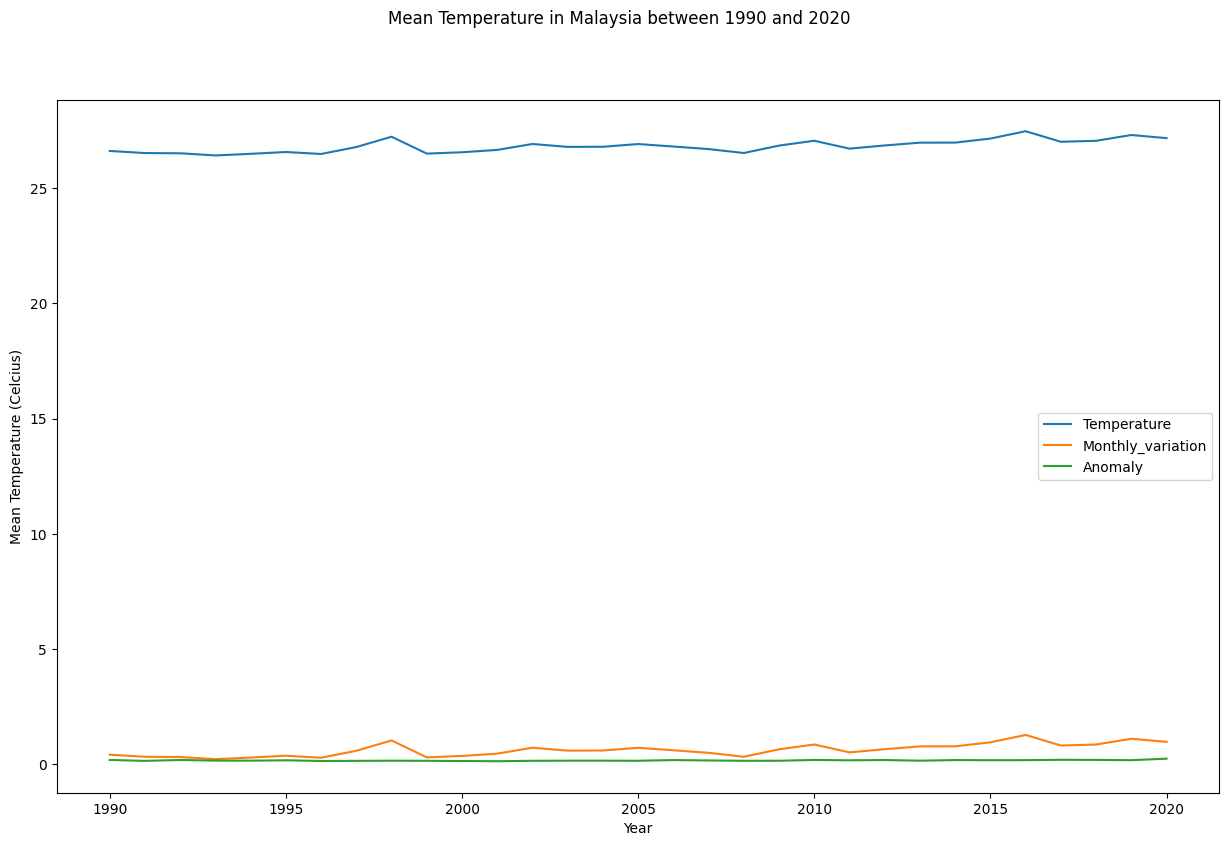

In [49]:
# temperature_df.loc[temperature_df['Country'] == 'Malaysia'].groupby('Year').mean().plot()

fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean Temperature in Malaysia between 1990 and 2020')

malaysia_temp = temperature_data.loc[(temperature_data['Year'] >= 1990) & (temperature_data['Country'] == 'Malaysia')].groupby('Year')[['Temperature','Monthly_variation', 'Anomaly']].mean().plot(ax=ax)

ax.set_ylabel('Mean Temperature (Celcius)')
ax.set_xlabel('Year')
plt.show()

In [50]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534571 entries, 0 to 534570
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               534571 non-null  int64  
 1   Month              534571 non-null  int64  
 2   Country            534571 non-null  object 
 3   Temperature        508818 non-null  float64
 4   Monthly_variation  508818 non-null  float64
 5   Anomaly            508818 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 24.5+ MB


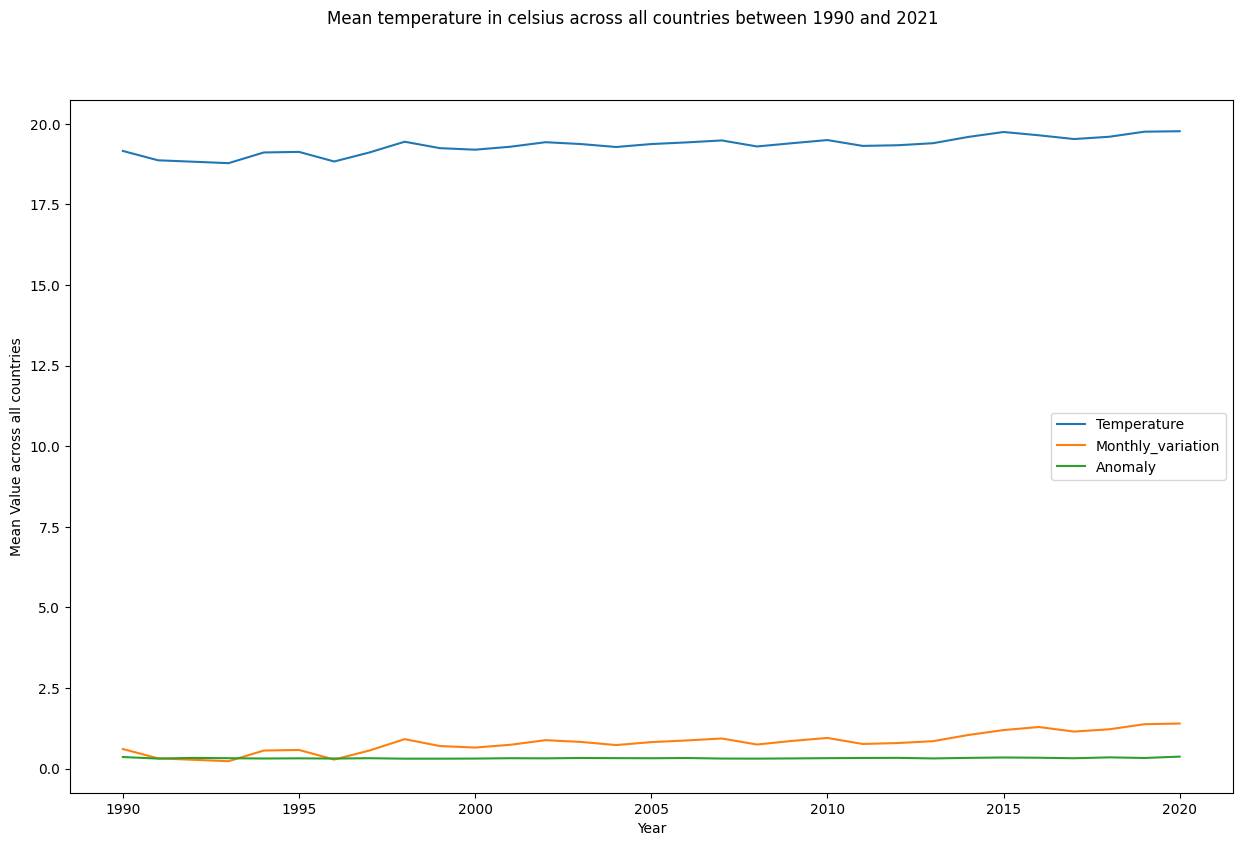

In [51]:
# prepare data
period = temperature_data.loc[(temperature_data['Year'] >= 1990)]
temp_data = period.groupby('Year')[['Temperature','Monthly_variation', 'Anomaly']].mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1990 and 2021')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Yield data

In [52]:
top10crop = yield_data.query("Item in ('Cassava, fresh','Maize (corn)','Rice','Wheat','Soya beans','Potatoes','Sorghum','Sweet potatoes','Yams','Plantains and cooking bananas')")

In [53]:
top10crop

,Area,Item,Element,Unit,Year,Value
288,Afghanistan,Maize (corn),Yield,hg/ha,1990,17582.0
289,Afghanistan,Maize (corn),Yield,hg/ha,1991,16800.0
290,Afghanistan,Maize (corn),Yield,hg/ha,1992,15000.0
291,Afghanistan,Maize (corn),Yield,hg/ha,1993,16786.0
292,Afghanistan,Maize (corn),Yield,hg/ha,1994,16667.0
...,...,...,...,...,...,...
352135,Polynesia,Yams,Yield,hg/ha,2017,15178.0
352136,Polynesia,Yams,Yield,hg/ha,2018,42519.0
352137,Polynesia,Yams,Yield,hg/ha,2019,89235.0
352138,Polynesia,Yams,Yield,hg/ha,2020,93449.0


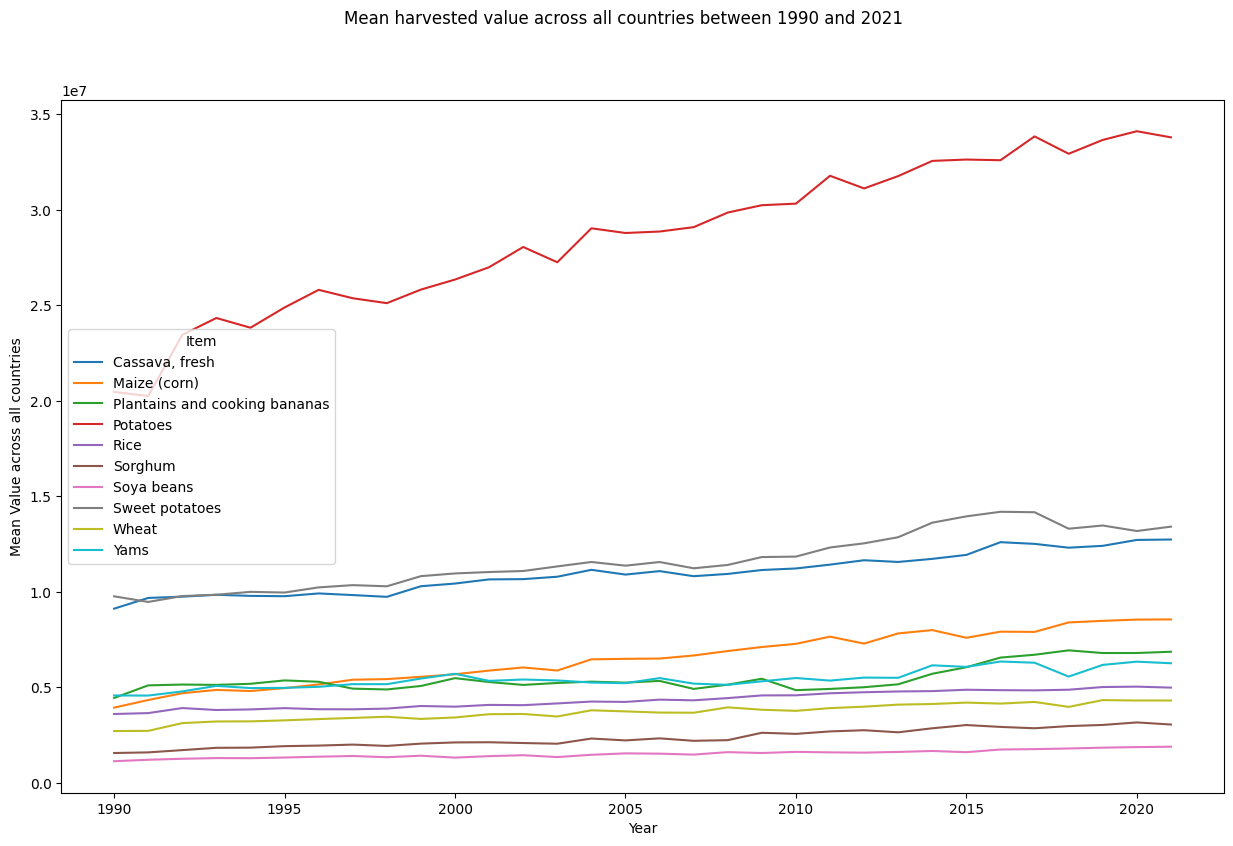

In [54]:
# prepare data
yield_mean = top10crop.groupby(['Year', 'Item']).sum()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1990 and 2021')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

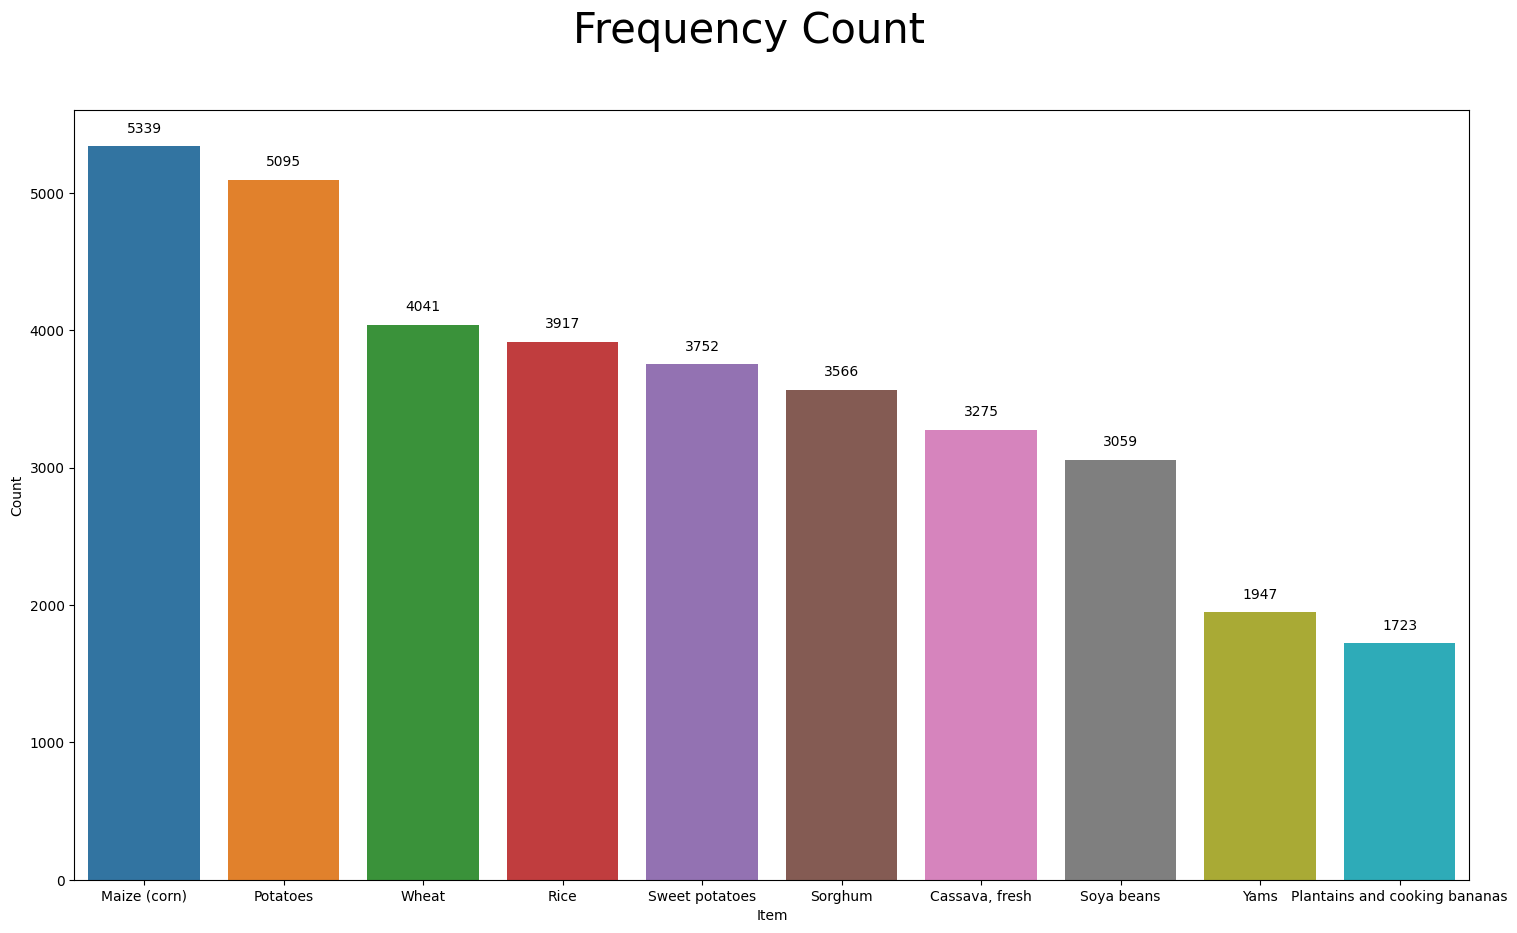

In [55]:
fig, axs = plt.subplots(1,1, figsize=(18,10))
fig.suptitle('Frequency Count', size=30)

temp_df = top10crop['Item'].value_counts().to_frame().reset_index()
temp_df.columns = ['Item', 'Count']
g = sns.barplot(x='Item', y='Count', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name, row.Count + 100, row.Count, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

plt.show()

## Pesticide data

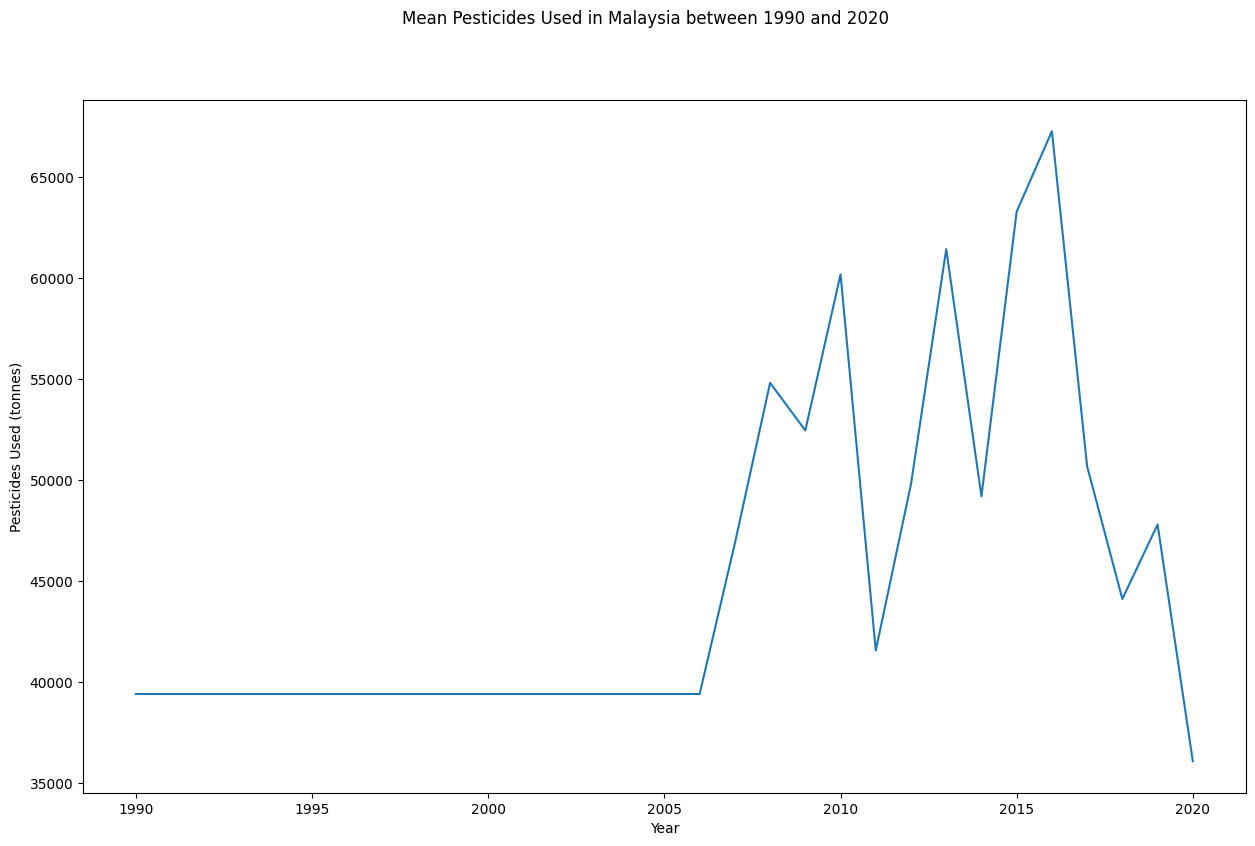

In [56]:
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean Pesticides Used in Malaysia between 1990 and 2020')

pesticides_df.loc[pesticides_df['Country'] == 'Malaysia'].groupby('Year')['Pesticides (tonnes)'].mean().plot(ax=ax)

ax.set_ylabel('Pesticides Used (tonnes)')
ax.set_xlabel('Year')
plt.show()

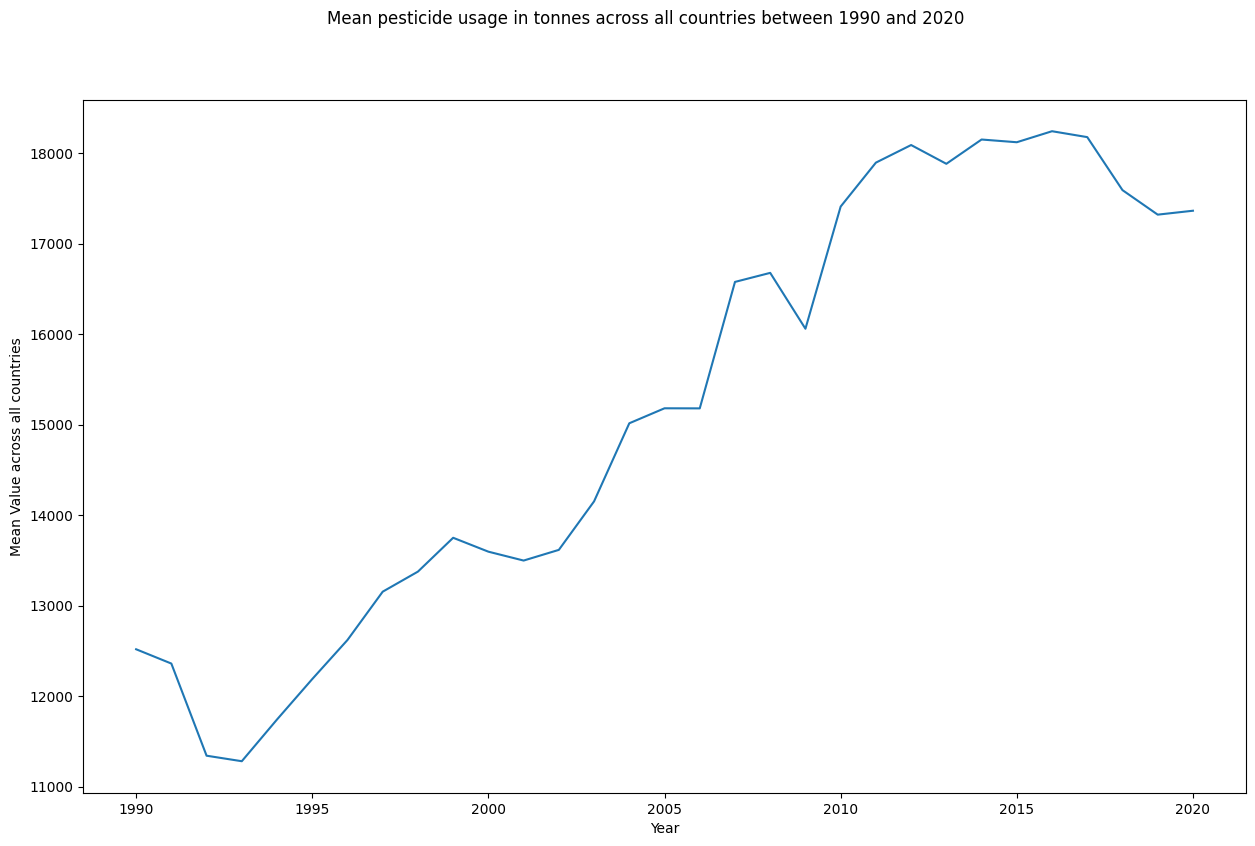

In [57]:
# prepare data
temp_data = pesticides_df.groupby('Year')['Pesticides (tonnes)'].mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all countries between 1990 and 2020')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Merged data

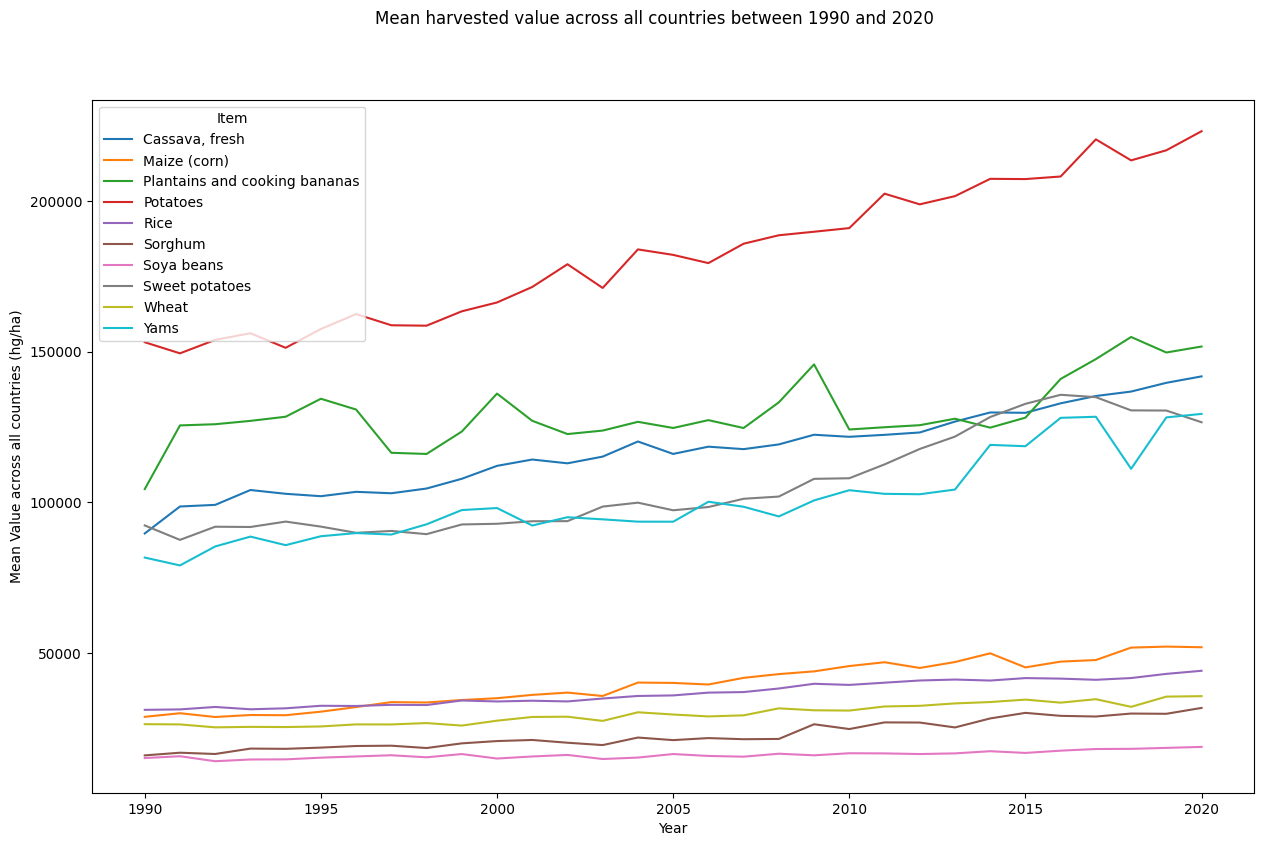

In [58]:
# prepare data
temp_data = data.query("Item in ('Cassava, fresh','Maize (corn)','Rice','Wheat','Soya beans','Potatoes','Sorghum','Sweet potatoes','Yams','Plantains and cooking bananas')")
temp_data.loc[:, 'Yield (hg/ha)'] = pd.to_numeric(temp_data['Yield (hg/ha)'], errors='coerce')
# Remove rows with NaN values in 'Yield (hg/ha)' column
temp_data = temp_data.dropna(subset=['Yield (hg/ha)'])

# Group by 'Year' and 'Item' and calculate the mean
temp_data = temp_data.groupby(['Year', 'Item'])['Yield (hg/ha)'].mean().reset_index()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1990 and 2020')

temp_data.pivot(index='Year', columns='Item', values='Yield (hg/ha)').plot(ax=ax)

ax.set_ylabel('Mean Value across all countries (hg/ha)')
ax.set_xlabel('Year')

plt.show()

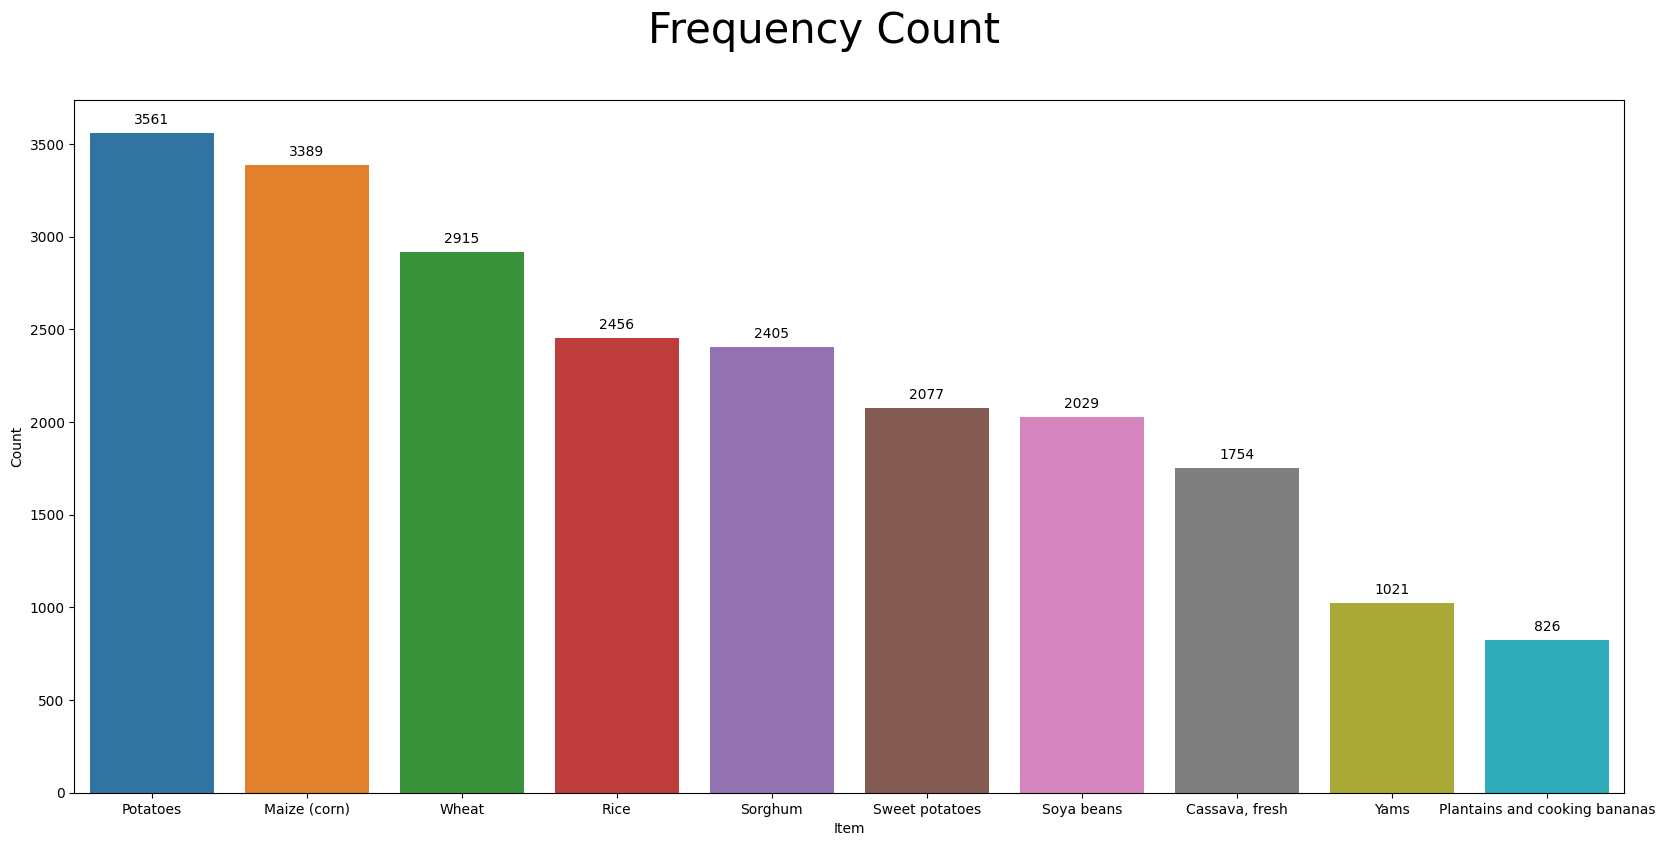

In [59]:
fig, axs = plt.subplots(1,1, figsize=(20,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data.query("Item in ('Cassava, fresh','Maize (corn)','Rice','Wheat','Soya beans','Potatoes','Sorghum','Sweet potatoes','Yams','Plantains and cooking bananas')")
item_counts = temp_df['Item'].value_counts().reset_index()
item_counts.columns = ['Item', 'Count']
g = sns.barplot(x='Item', y='Count', data=item_counts, orient='v', ax=axs)

for index, row in item_counts.iterrows():
    g.text(row.name,row.Count + 50, row.Count, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

plt.show()

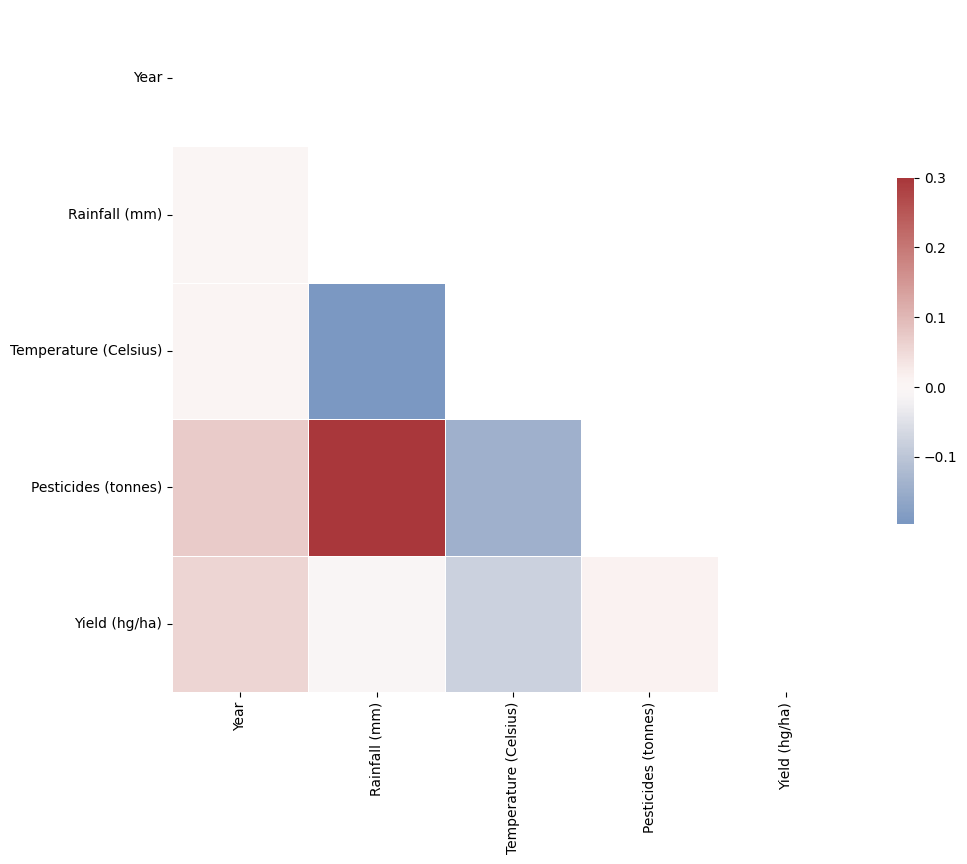

In [60]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Data Preprocessing

In [61]:
predict_data = data.query("Year == 2020")
#For the end of the prediction where we can compared the predicted values and actual values side
#by side.
predict_data2 = data.query("Year == 2020")
data = data.query("Year <= 2019")

In [62]:
predict_data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
219610,2020,Albania,Apples,974.522337,14.35175,756.51,231147.0
219611,2020,Albania,Apricots,974.522337,14.35175,756.51,149506.0
219612,2020,Albania,Barley,974.522337,14.35175,756.51,33532.0
219613,2020,Albania,"Beans, dry",974.522337,14.35175,756.51,19303.0
219614,2020,Albania,"Broad beans and horse beans, dry",974.522337,14.35175,756.51,12141.0
...,...,...,...,...,...,...,...
227001,2020,Zimbabwe,"Pulses, Total",786.204172,21.95925,2185.07,3578.0
227002,2020,Zimbabwe,"Roots and Tubers, Total",786.204172,21.95925,2185.07,45677.0
227003,2020,Zimbabwe,Sugar Crops Primary,786.204172,21.95925,2185.07,753994.0
227004,2020,Zimbabwe,"Treenuts, Total",786.204172,21.95925,2185.07,20856.0


In [63]:
data.tail()

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
219605,2019,Zimbabwe,"Pulses, Total",495.380392,22.698167,2185.07,2764.0
219606,2019,Zimbabwe,"Roots and Tubers, Total",495.380392,22.698167,2185.07,45591.0
219607,2019,Zimbabwe,Sugar Crops Primary,495.380392,22.698167,2185.07,774348.0
219608,2019,Zimbabwe,"Treenuts, Total",495.380392,22.698167,2185.07,20183.0
219609,2019,Zimbabwe,Vegetables Primary,495.380392,22.698167,2185.07,66678.0


## One Hot Encoding

In [64]:
data.shape

(219610, 7)

In [65]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [66]:
data.shape

(219610, 305)

## Backward Elimination

In [67]:
data.shape

(219610, 305)

In [68]:
print(data.dtypes)

Year                       int64
Rainfall (mm)            float64
Temperature (Celsius)    float64
Pesticides (tonnes)      float64
Country_Albania             bool
                          ...   
Item_Watermelons            bool
Item_Wheat                  bool
Item_Yams                   bool
Item_Yautia                 bool
Yield (hg/ha)            float64
Length: 305, dtype: object


In [69]:
import statsmodels.api as sm
# Convert the 'Yield (hg/ha)' column to a numeric dtype
data['Yield (hg/ha)'] = pd.to_numeric(data['Yield (hg/ha)'], errors='coerce')

# Drop rows with missing values in the 'Yield (hg/ha)' column
data = data.dropna(subset=['Yield (hg/ha)'])
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

In [70]:
data.shape

(219610, 285)

## Removing of Outliers

In [71]:
data.shape

(219610, 285)

In [72]:
data.head(10)

,Year,Rainfall (mm),Temperature (Celsius),Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,...,Item_Tung nuts,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Vegetables Primary,Item_Vetches,"Item_Walnuts, in shell",Item_Watermelons,Item_Wheat,Item_Yams,Yield (hg/ha)
0,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,50385.0
1,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,43814.0
2,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,10000.0
3,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6364.0
4,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,180769.0
5,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,150000.0
6,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,171429.0
7,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,41322.0
8,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,147368.0
9,1990,1051.851025,13.69375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,281818.0


In [73]:
from scipy import stats

# y = data['Yield (hg/ha)']
# X = data.drop('Yield (hg/ha)', axis=1)

# Exclude boolean columns from X
numeric_columns = data.columns.drop(['Year', 'Rainfall (mm)', 'Temperature (Celsius)', 'Yield (hg/ha)'])
X = data[numeric_columns]

z_scores = stats.zscore(X.values, axis=0)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
data = data[filtered_entries]

data['Yield (hg/ha)'] = y[filtered_entries]

In [74]:
data.shape

(76734, 285)

## Feature Scaling

In [75]:
data.shape

(76734, 285)

In [76]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [77]:
data.shape

(76734, 285)

In [78]:
# data.to_csv('preprocessed_data.csv')

# Modeling

In [79]:
# data = pd.read_csv('preprocessed_data.csv')

In [80]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Show the values in a box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

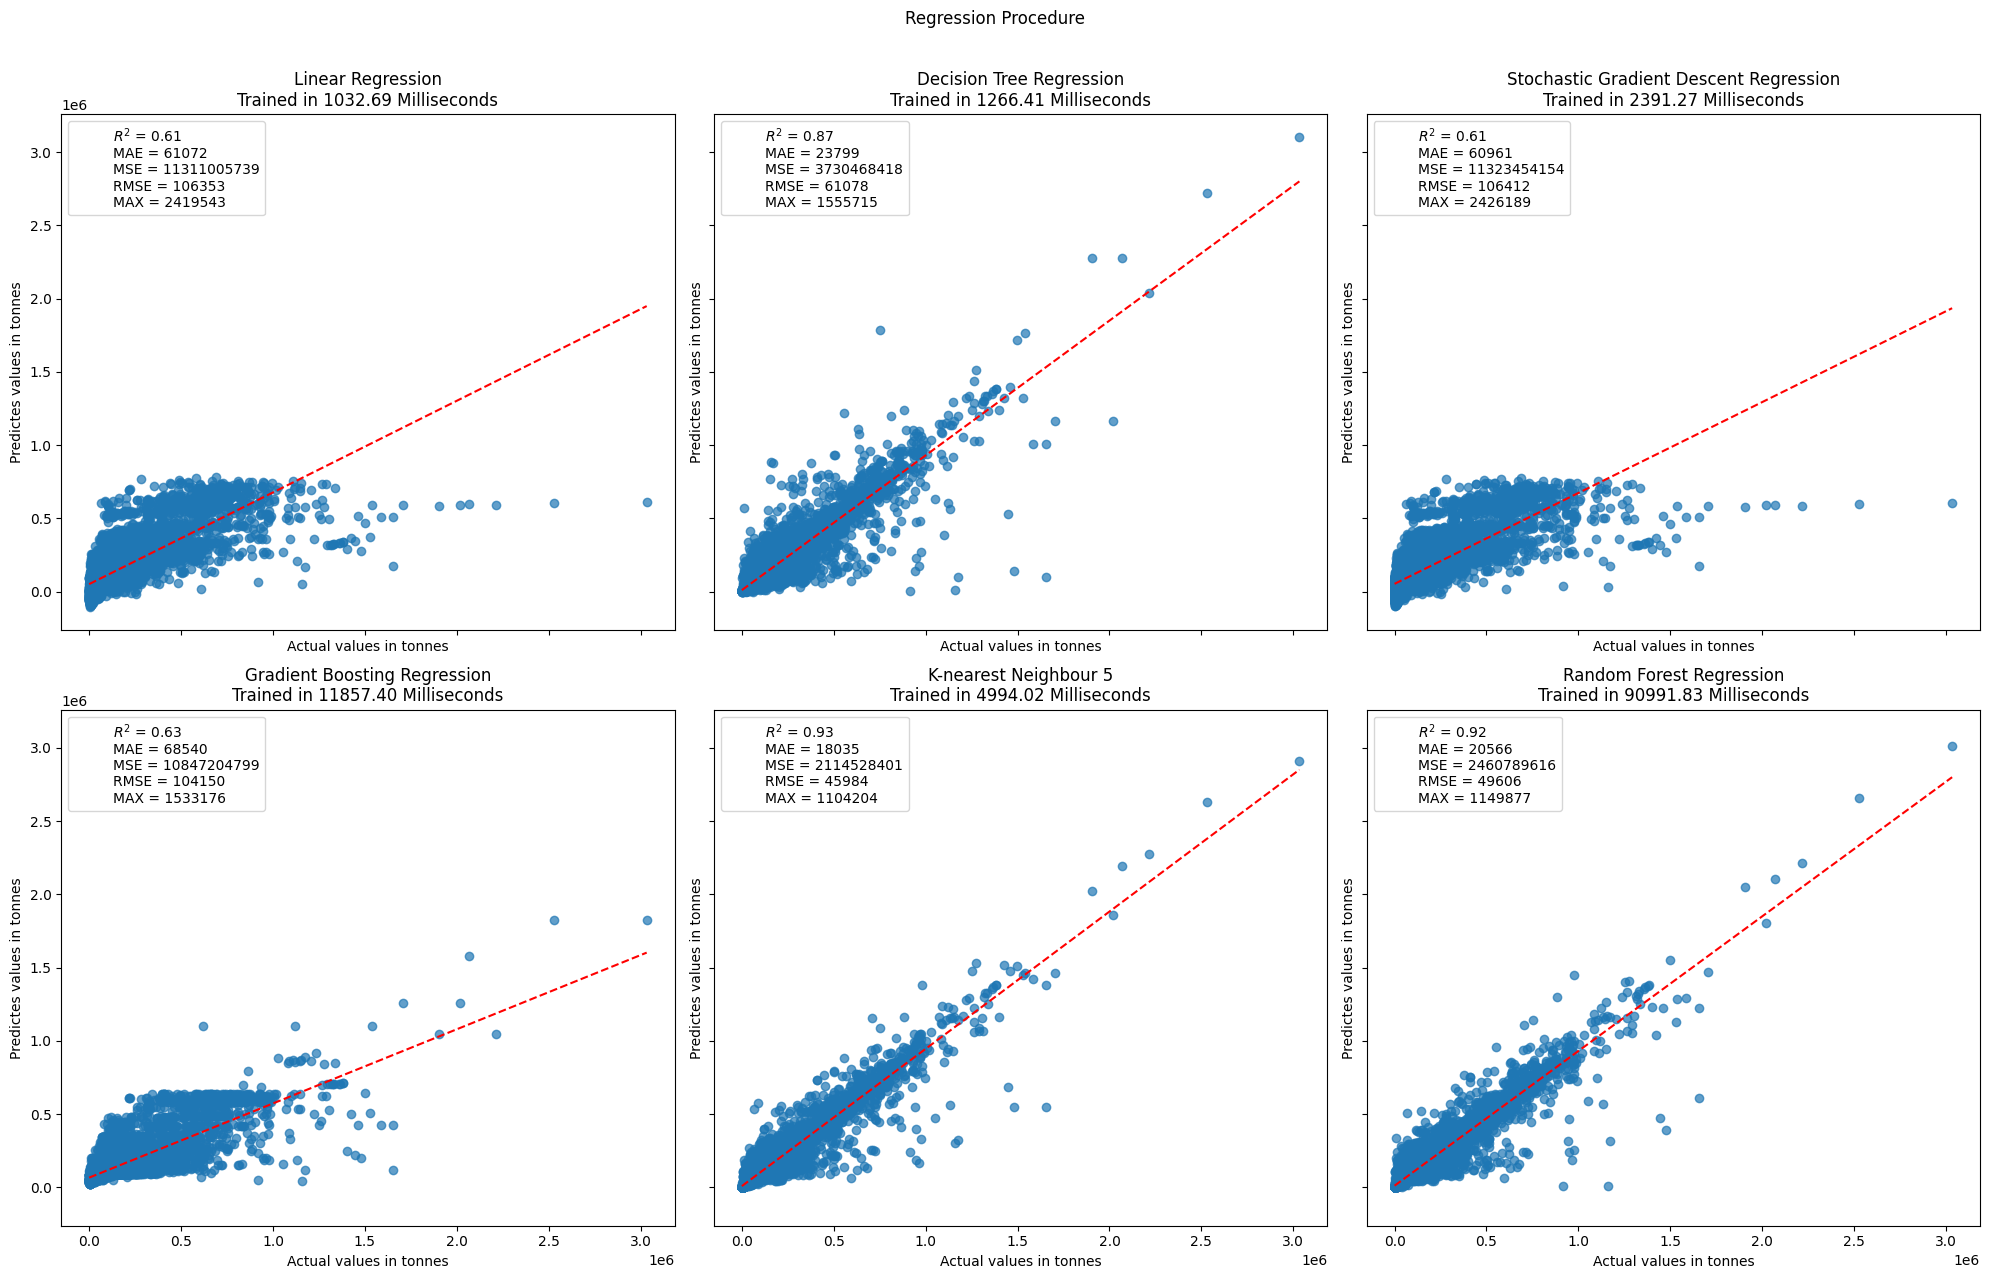

In [83]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_error')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Regressions used
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Set the subplot
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Training the Model
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Plot the Model
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r'$R^2$ = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred)))
  
plt.suptitle('Regression Procedure')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

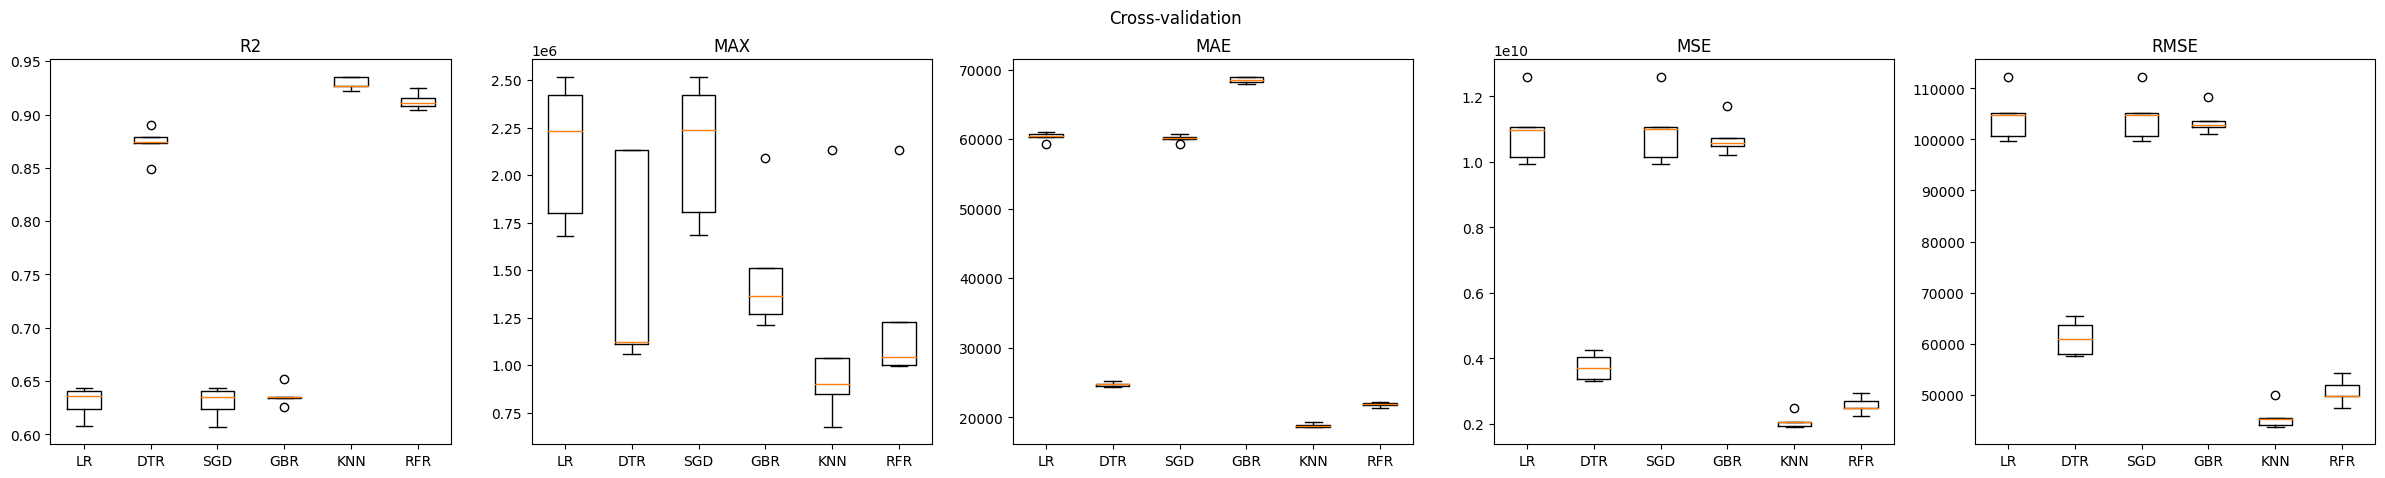

In [84]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Cross Validation
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Saving the Values
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plot the Values
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [85]:
regression = 4

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))

R²: 0.929 ± 0.005
MAX: 1,117,841 ± 519,112
MAE: 18,851 ± 252
MSE: 2,093,443,383 ± 207,940,844
RMSE: 45,701 ± 2,212


## Fine Tune Hyperparameters

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [99]:
#List Hyperparameters that we want to tune.
n_neighbors = [4,5,6,7,8]
p=[1,2]
leaf_size = [10, 20, 30, 40]
# weights = ['uniform','distance']
algorithm = ['auto']
metric = ['euclidean']
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, leaf_size = leaf_size)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5, scoring = 'r2')
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Hyperparameters:', best_model.best_estimator_.get_params())
print(best_model.best_params_)
print('Best R2 Score:', best_model.best_score_)

Best leaf_size: 10
Best p: 1
Best n_neighbors: 5
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
{'leaf_size': 10, 'n_neighbors': 5, 'p': 1}
Best R2 Score: 0.9312471597791923


## Predict the Year 2020

In [100]:
predict_data.head(20)

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
219610,2020,Albania,Apples,974.522337,14.35175,756.51,231147.0
219611,2020,Albania,Apricots,974.522337,14.35175,756.51,149506.0
219612,2020,Albania,Barley,974.522337,14.35175,756.51,33532.0
219613,2020,Albania,"Beans, dry",974.522337,14.35175,756.51,19303.0
219614,2020,Albania,"Broad beans and horse beans, dry",974.522337,14.35175,756.51,12141.0
219615,2020,Albania,"Broad beans and horse beans, green",974.522337,14.35175,756.51,50012.0
219616,2020,Albania,Cabbages,974.522337,14.35175,756.51,358252.0
219617,2020,Albania,Cantaloupes and other melons,974.522337,14.35175,756.51,291312.0
219618,2020,Albania,Carrots and turnips,974.522337,14.35175,756.51,284193.0
219619,2020,Albania,Cauliflowers and broccoli,974.522337,14.35175,756.51,217048.0


### Apply Preproccessing Done Previously

In [101]:
#One Hot Encoding
df_onehot2 = pd.get_dummies(predict_data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
predict_data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
predict_data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

#Backward Elimination
y2 = predict_data['Yield (hg/ha)']
X2 = predict_data.drop('Yield (hg/ha)', axis=1)

cols = list(X2.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X2[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y2,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

predict_data = predict_data[cols]
predict_data.insert(len(predict_data.columns), 'Yield (hg/ha)', y2)

# #Removing of Outliers
y2 = predict_data['Yield (hg/ha)']
X2 = predict_data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X2)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X2 = X2[filtered_entries]

X2.insert(len(X2.columns), 'Yield (hg/ha)', y2)
predict_data = X2

#Feature Scaling
y2 = predict_data['Yield (hg/ha)']
X2 = predict_data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X2), index=y2.index)
data_without_yield.columns = X2.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y2)

predict_data = data_without_yield


#Modeling
y2 = predict_data['Yield (hg/ha)']
X2 = predict_data.drop('Yield (hg/ha)', axis=1)

In [102]:
predicted_yield = best_model.predict(X2)

In [103]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y2, predicted_yield)
rmse = np.sqrt(mse)
r2 = r2_score(y2, predicted_yield)
mape = mean_absolute_percentage_error(y2, predicted_yield)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 1368035779.7526333
Root Mean Squared Error (RMSE): 36986.96770151121
R² Score: 0.9534992061157275


In [104]:
predict_data['Predicted Yield'] = predicted_yield

In [105]:
predict_data.head(20)

,Year,Rainfall (mm),Temperature (Celsius),Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,...,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Vegetables Primary,Item_Vetches,"Item_Walnuts, in shell",Item_Watermelons,Item_Wheat,Item_Yams,Yield (hg/ha),Predicted Yield
0,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50385.0,60813.4
2,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,18177.2
3,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6364.0,7366.0
4,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180769.0,178168.0
5,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.0,208012.2
6,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171429.0,182619.2
8,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147368.0,97800.2
9,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281818.0,291858.6
12,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64518.0,54971.0
13,0.0,0.033213,0.528193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000.0,66477.4


In [106]:
compare_values = predict_data[['Yield (hg/ha)', 'Predicted Yield']]
compare_values.head(20)

,Yield (hg/ha),Predicted Yield
0,50385.0,60813.4
2,10000.0,18177.2
3,6364.0,7366.0
4,180769.0,178168.0
5,150000.0,208012.2
6,171429.0,182619.2
8,147368.0,97800.2
9,281818.0,291858.6
12,64518.0,54971.0
13,65000.0,66477.4


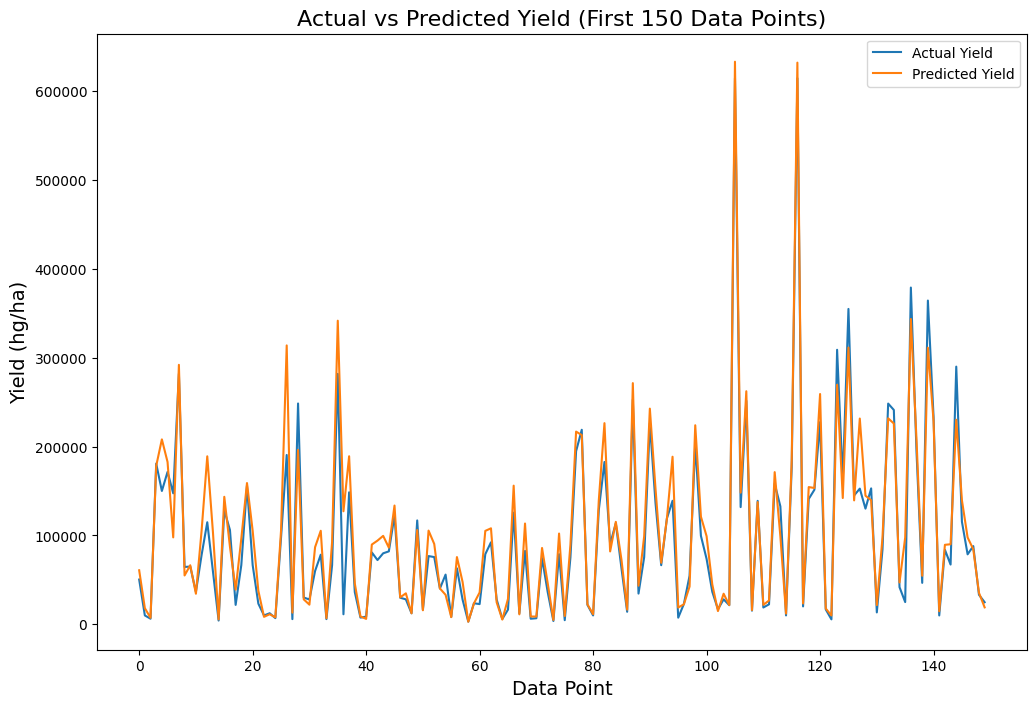

In [147]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a list of x values (indices of data points)
x = list(range(150))

actual_yield_col = compare_values['Yield (hg/ha)'].iloc[:150]
predicted_yield_col = compare_values['Predicted Yield'].iloc[:150]

# Plot the actual and predicted yield
plt.plot(x, actual_yield_col, label='Actual Yield')
plt.plot(x, predicted_yield_col, label='Predicted Yield')

# Set labels and title
plt.xlabel('Data Point', fontsize=14)
plt.ylabel('Yield (hg/ha)', fontsize=14)
plt.title('Actual vs Predicted Yield (First 150 Data Points)', fontsize=16)

# Add legend
plt.legend()

# Save the plot as a PNG file
plt.savefig('actual_predicted_graph.png', dpi=400)

# Show the plot
plt.show()



The model was trained with data upto 2019, so data from 2020 is unseen data for the model.
Based on the graph above, our model is working well enough to predict crop yield that is approximately similar to real-world crop yield values.